In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder #Transforma las variables categórica a numéricas

In [52]:
#Step 1. Load Data

df_raw = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [53]:
df_raw.sample(10, random_state=2025)
# X = [age, sex, bmi, childre, smoker, ''region'']
# y = charges

,age,sex,bmi,children,smoker,region,charges
1269,45,male,27.500,3,no,southwest,8615.30000
942,18,female,40.185,0,no,northeast,2217.46915
1240,52,male,41.800,2,yes,southeast,47269.85400
1229,58,male,30.305,0,no,northeast,11938.25595
272,41,male,37.050,2,no,northwest,7265.70250
738,23,male,31.730,3,yes,northeast,36189.10170
1105,54,female,31.240,0,no,southeast,10338.93160
1182,25,female,30.300,0,no,southwest,2632.99200
14,27,male,42.130,0,yes,southeast,39611.75770
596,42,female,29.480,2,no,southeast,7640.30920


In [54]:
#Step 2 Preprocessing

df_baking = df_raw.copy()
df_baking['sex'] = df_baking['sex'].astype('category')
df_baking['region'] = df_baking['region'].astype('category')
df_baking['smoker'] = df_baking['smoker'].astype('category')

df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [55]:
#Step 3 EDA
df_train, df_test = train_test_split(df, test_size=0.1, random_state=2025)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.shape, df_test.shape

((1204, 7), (134, 7))

In [56]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
age,1204.0,39.181063,14.151788,18.0000,26.00000,39.00000,51.00000,64.00000
bmi,1204.0,30.643800,6.086388,15.9600,26.22000,30.40000,34.71750,53.13000
children,1204.0,1.093854,1.199333,0.0000,0.00000,1.00000,2.00000,5.00000
charges,1204.0,13345.661206,12161.286683,1121.8739,4744.32505,9423.92265,16924.52835,63770.42801


,count,unique,top,freq
sex,1204,2,male,604
smoker,1204,2,no,956
region,1204,4,southeast,320


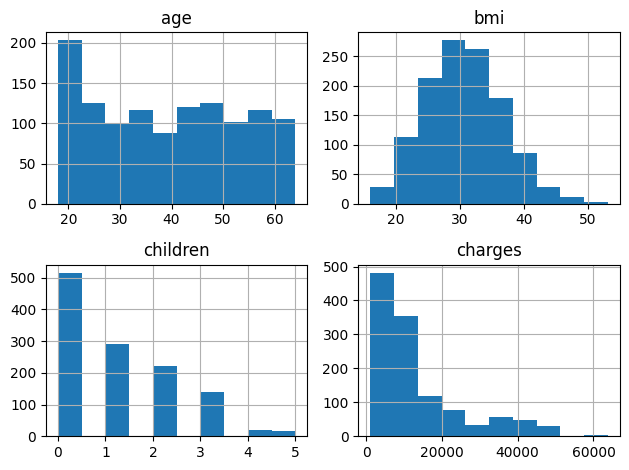

In [57]:
df_train.hist()
plt.tight_layout()
plt.show()

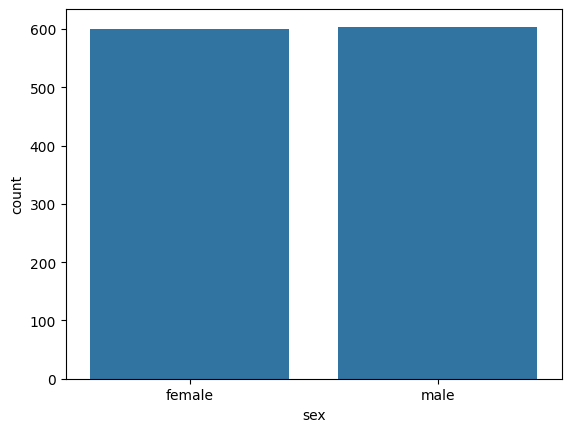

In [58]:
sns.countplot(df_train, x='sex')
plt.show()

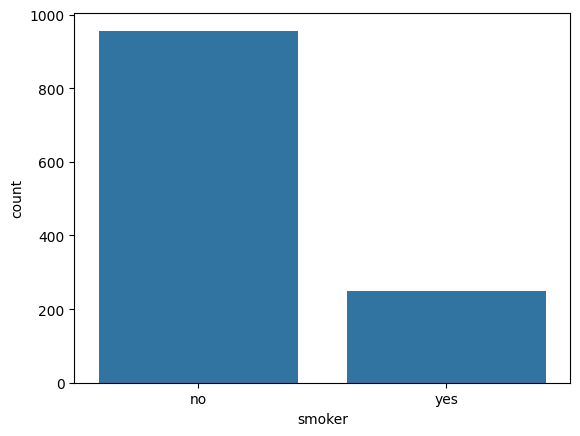

In [59]:
sns.countplot(df_train, x='smoker')
plt.show()

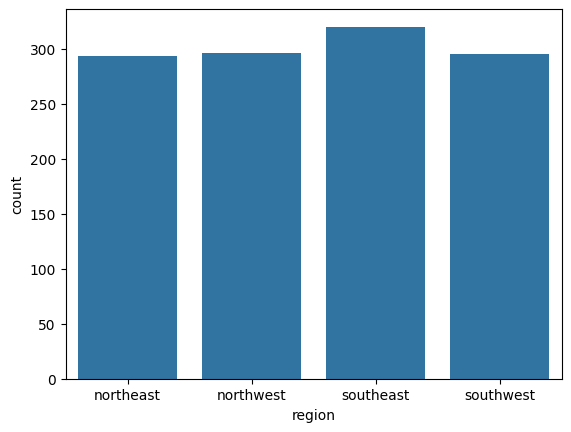

In [60]:
sns.countplot(df_train, x='region')
plt.show()

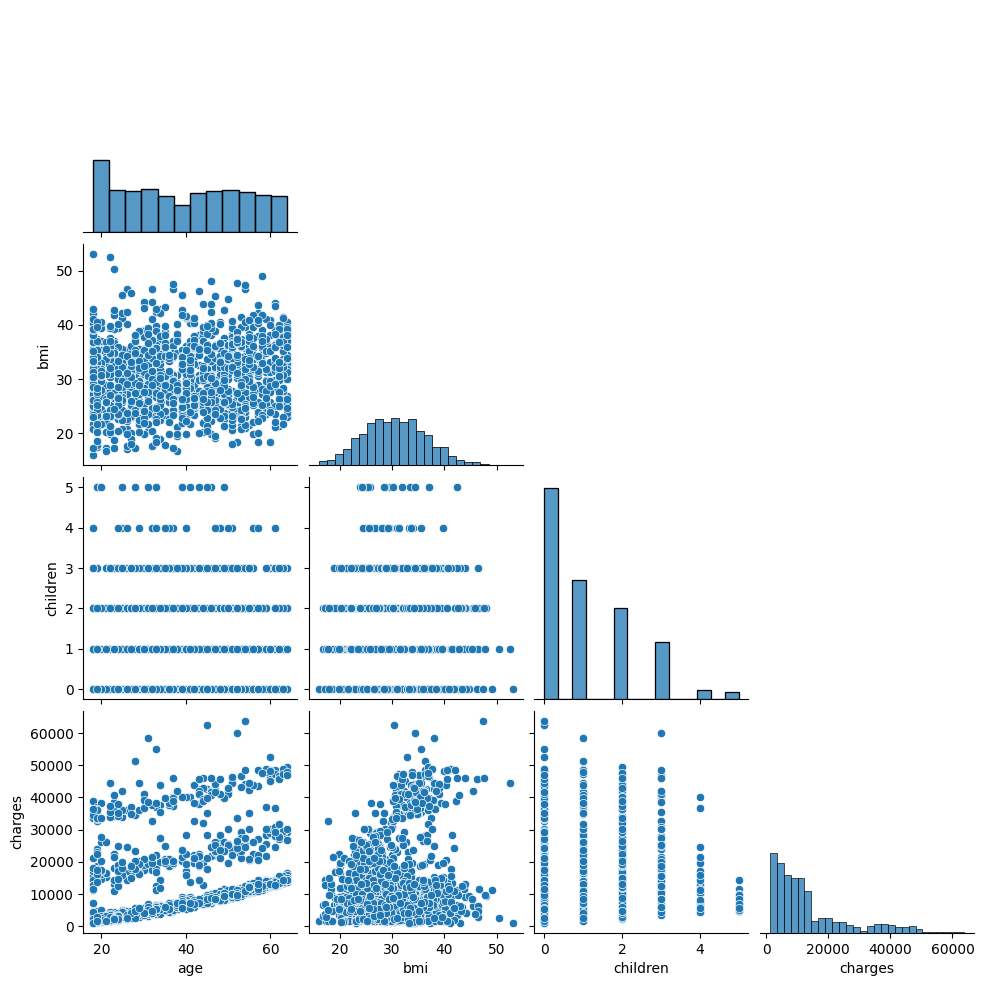

In [61]:
sns.pairplot(data=df_train, corner=True)
plt.show()

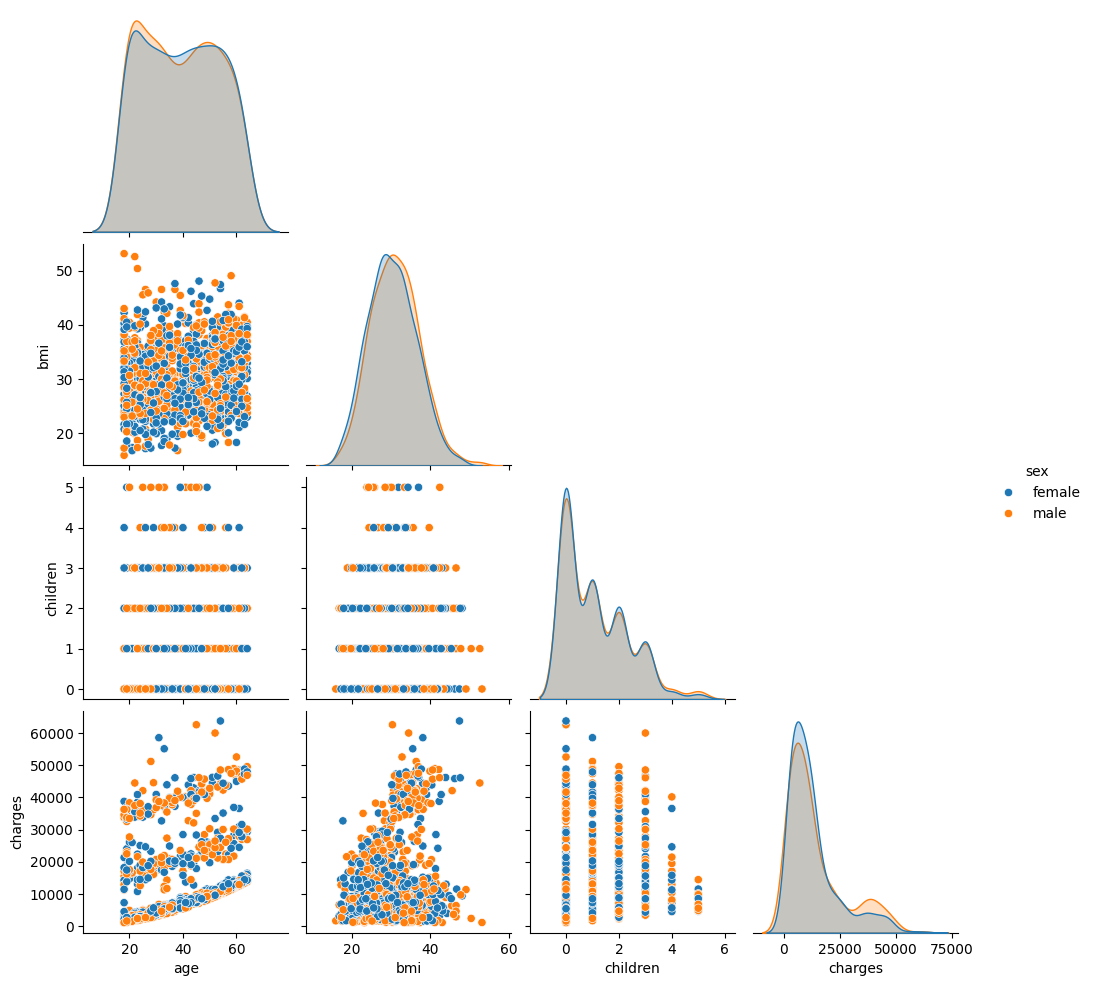

In [62]:
sns.pairplot(df_train, hue='sex', corner=True)
plt.show()

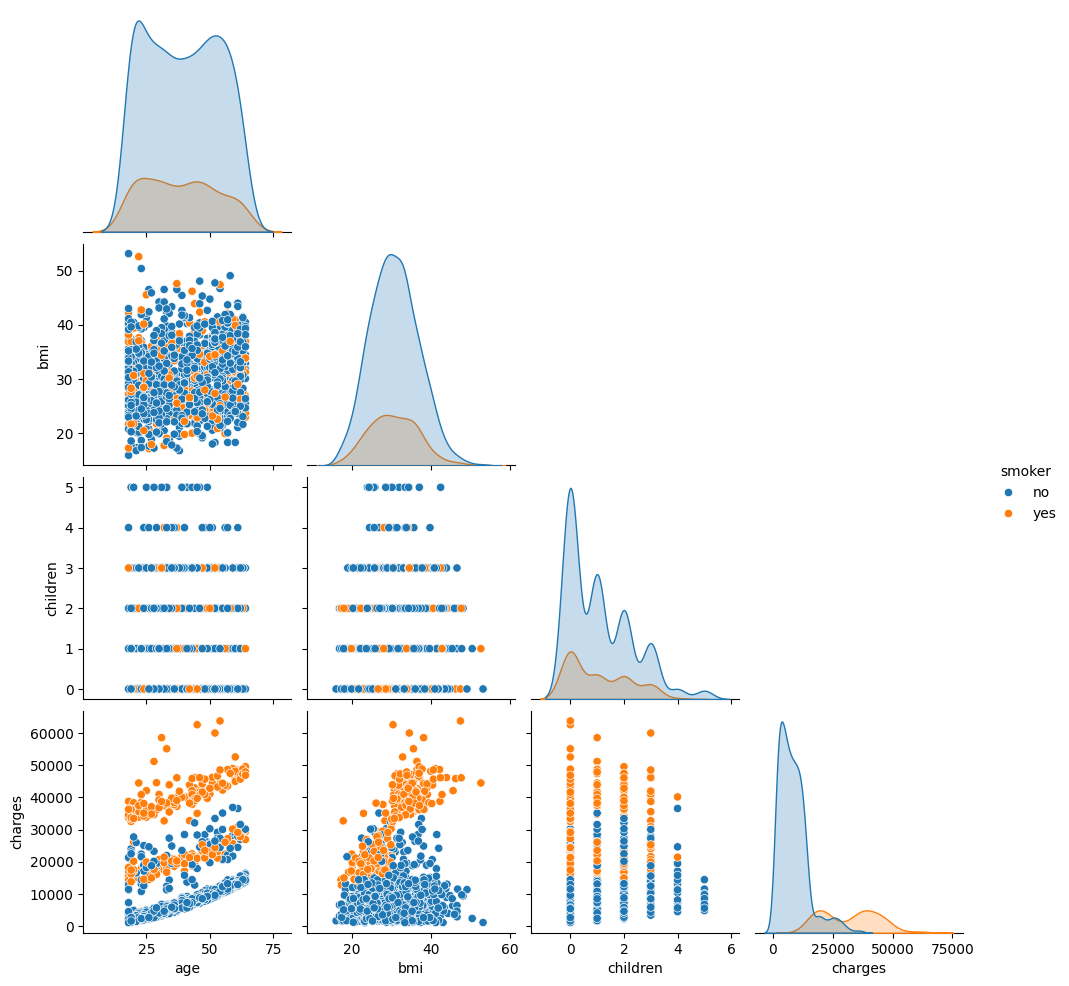

In [63]:
sns.pairplot(df_train, hue='smoker', corner=True)
plt.show()

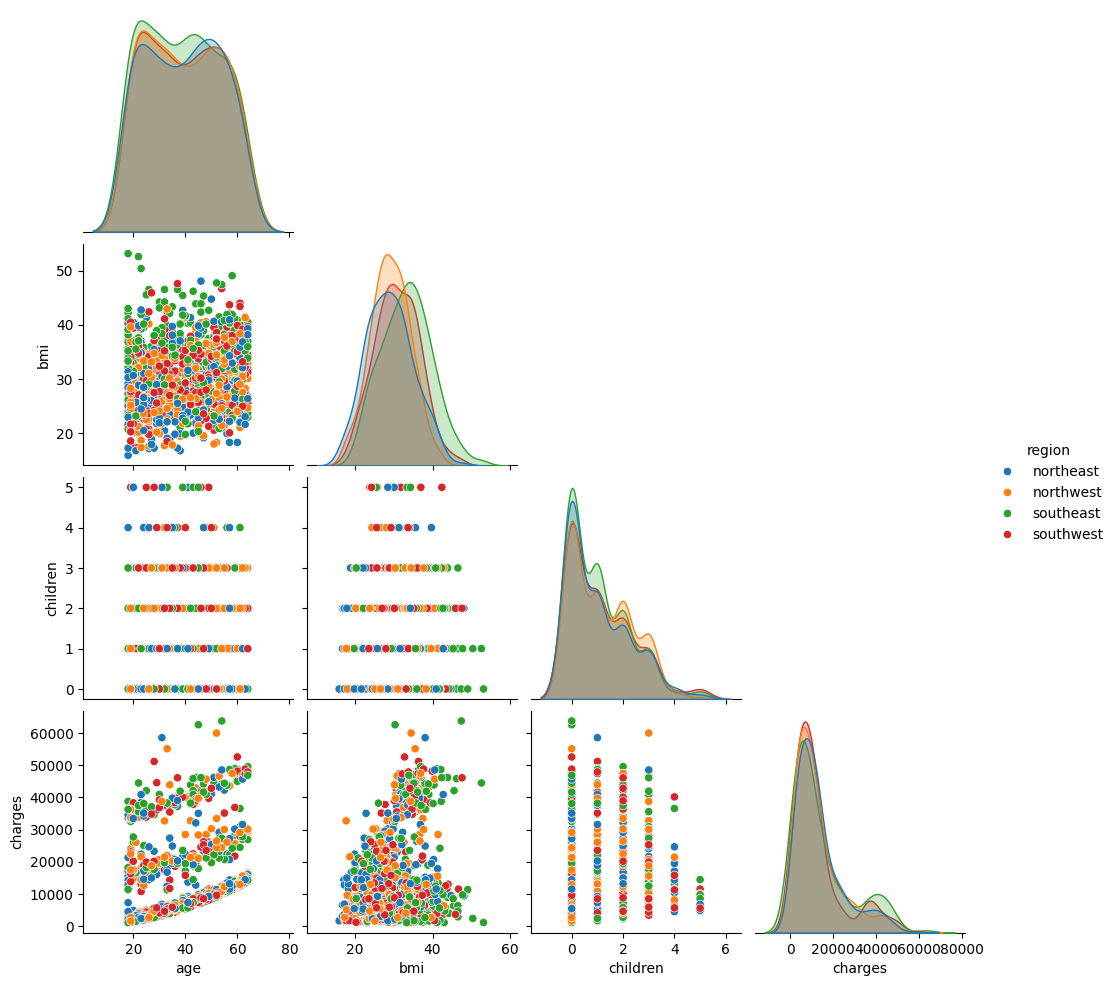

In [64]:
sns.pairplot(df_train, hue='region', corner=True)
plt.show()

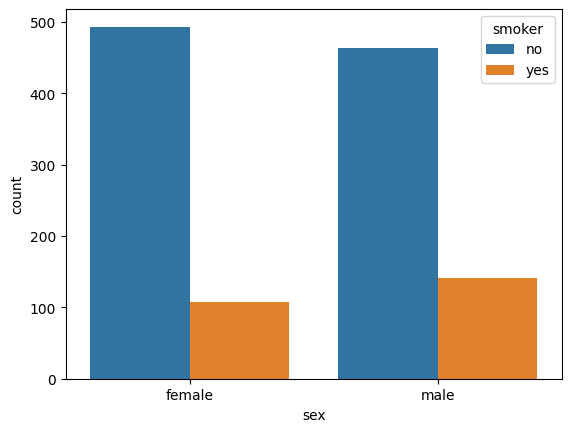

In [65]:
sns.countplot(df_train, x='sex', hue='smoker')
plt.show()

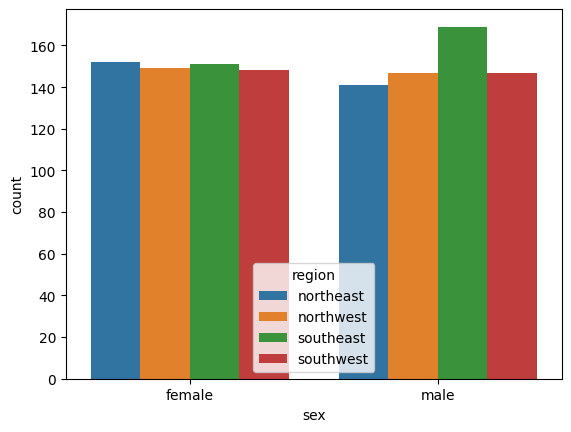

In [66]:
sns.countplot(df_train, x='sex', hue='region')
plt.show()

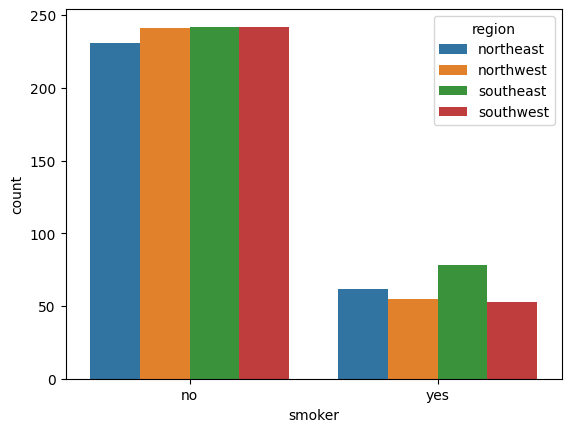

In [67]:
sns.countplot(df_train, x='smoker', hue='region')
plt.show()

In [68]:
#Step 4. ML
X_train = df_train.drop(columns='charges')
y_train = df_train['charges']

X_test = df_test.drop(columns='charges')
y_test = df_test['charges']

In [69]:
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('category').columns

num_proc = Pipeline(steps=[
    ('scaler',MinMaxScaler())
])
cat_proc = Pipeline(steps=[
    ('oneoht',OneHotEncoder())
])
processor = ColumnTransformer(transformers=[
    ('num',num_proc,num_cols),
    ('cat',cat_proc,cat_cols)
])
reg_lr = Pipeline(steps=[
    ('proc',processor),
    ('lr',LinearRegression())
])

In [75]:
reg_lr.fit(X_train, y_train)
y_hat = reg_lr.predict(X_test)

print(f'MSE(Mean squeare error): {mean_squared_error(y_test, y_hat):.2f}') #Prueba, prediccion
print(f'MAE(Mean absolute error): {mean_absolute_error(y_test, y_hat):.2f}')
print(f'RMSE(Root mean squeare error): {np.sqrt(mean_squared_error(y_test, y_hat)):.2f}')
print( f"R-cuadrado (R²): {r2_score(y_test, y_hat):.2f} ")

MSE(Mean squeare error): 29089708.46
MAE(Mean absolute error): 3812.49
RMSE(Root mean squeare error): 5393.49
R-cuadrado (R²): 0.78 
